In [1]:
from test_utils import * 
from train_utils import * 
from model import * 
from load_data import *
from sklearn.manifold import TSNE

In [21]:

train_loader, test_loader = get_stl10_loaders(batch_size=64)
images, labels = next(iter(train_loader))
print("Shape batch:", images.shape, labels.shape)

Shape batch: torch.Size([64, 3, 224, 224]) torch.Size([64])


In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AlexNet(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),
    lr=0.001, momentum=0.9,weight_decay=5e-4)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.1, patience=5)

In [27]:
print(model)

AlexNet(
  (features): Sequential(
    (0): ConvRelu(
      (net): Sequential(
        (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
        (1): ReLU(inplace=True)
        (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2.0)
      )
    )
    (1): MaxPool(
      (net): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvRelu(
      (net): Sequential(
        (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU(inplace=True)
        (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2.0)
      )
    )
    (3): MaxPool(
      (net): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): ConvRelu(
      (net): Sequential(
        (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (5): ConvRelu(
      (net): Sequential(
        (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), paddi

In [ ]:
epochs = 120

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    train_metrics = train_epoch_classification(train_loader, model, optimizer, criterion,
                                               device=device, amp=True)
    val_metrics = evaluate_classification(test_loader, model, criterion, device=device)

    # Update scheduler con accuracy de validación
    scheduler.step(val_metrics['acc1'])

In [ ]:
val_metrics = evaluate_classification(test_loader, model, criterion, device=device)

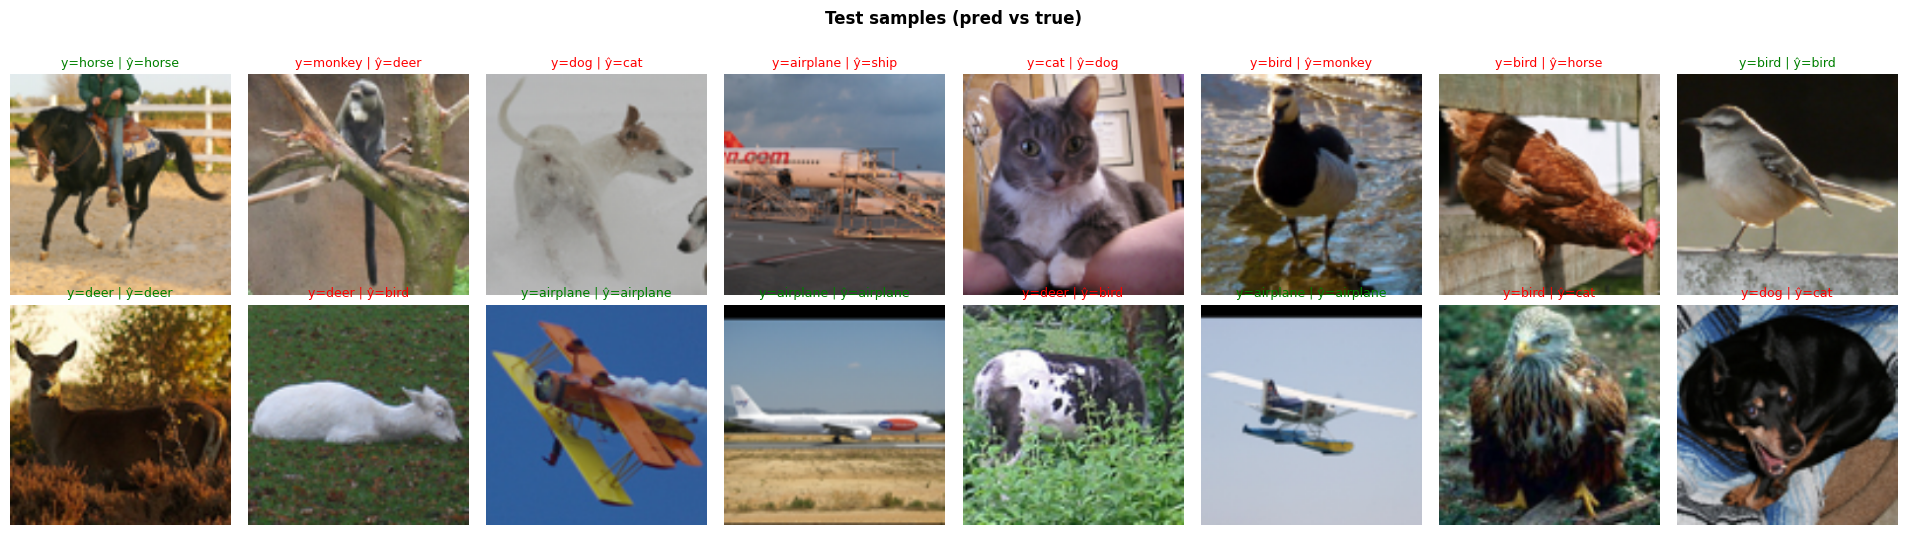

In [40]:
class_names = getattr(test_loader.dataset, 'classes', None)
visualize_test_predictions_rgb(model, test_loader, device=device, n=16, only_errors=False, class_names=class_names)

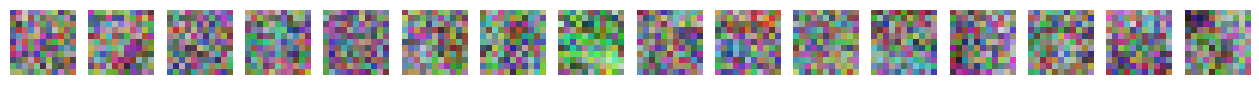

In [41]:

first_conv = model.features[0].net[0]
visualize_conv_filters(first_conv, num_filters=16)


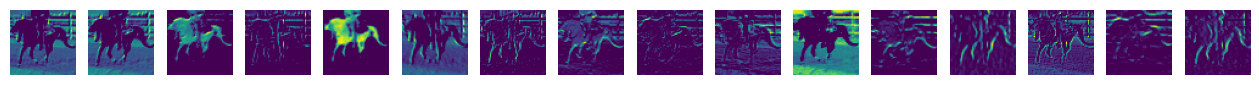

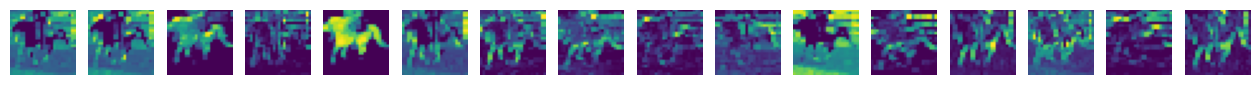

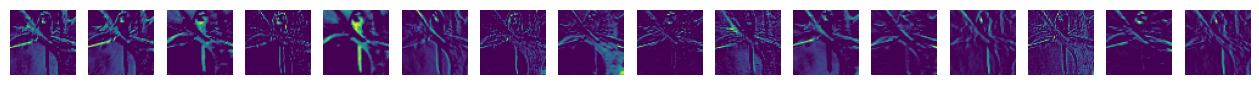

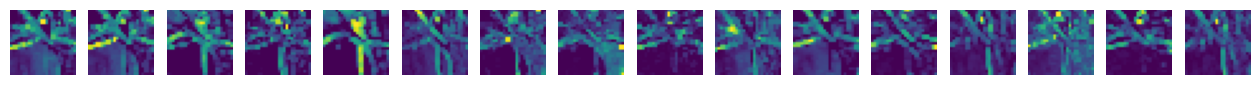

In [44]:

sample_img, _ = test_loader.dataset[0]
visualize_feature_maps(model, layer_idx=0,input_image=sample_img.unsqueeze(0),device=device, num_maps=16)
print()
sample_img, _ = test_loader.dataset[0]
visualize_feature_maps(model, layer_idx=1,input_image=sample_img.unsqueeze(0),device=device, num_maps=16)
print()



sample_img, _ = test_loader.dataset[1]
visualize_feature_maps(model, layer_idx=0,input_image=sample_img.unsqueeze(0),device=device, num_maps=16)
print()
sample_img, _ = test_loader.dataset[1]
visualize_feature_maps(model, layer_idx=1,input_image=sample_img.unsqueeze(0),device=device, num_maps=16)

Embeddings shape: (8000, 9216)
Reduciendo dimensionalidad con t-SNE...


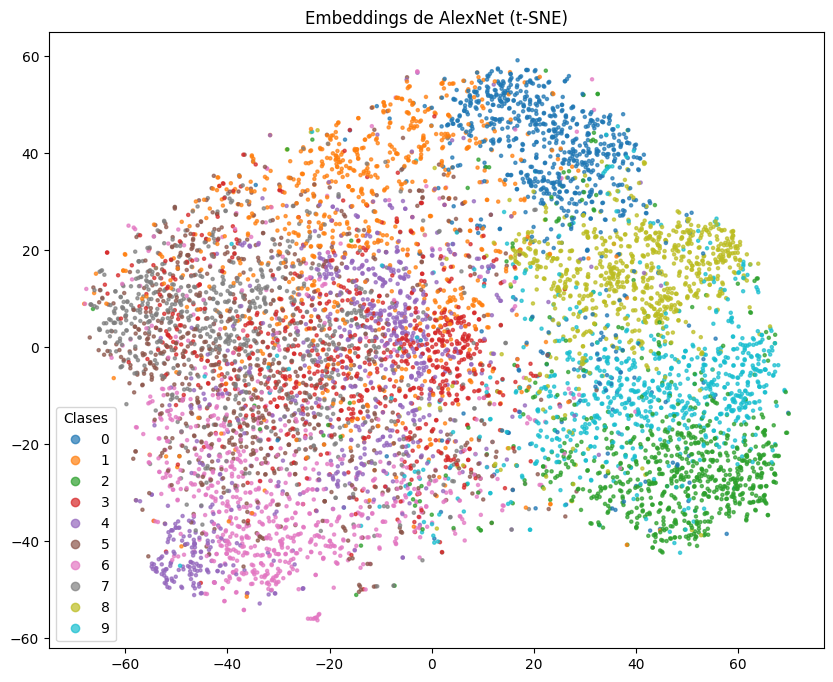

In [45]:

embeddings, labels = get_embeddings(model, test_loader, device)

print(f"Embeddings shape: {embeddings.shape}")

print("Reduciendo dimensionalidad con t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
emb_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(emb_2d[:,0], emb_2d[:,1], c=labels, cmap='tab10', s=5, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clases")
plt.title("Embeddings de AlexNet (t-SNE)")
plt.show()